<a href="https://colab.research.google.com/github/Qusay-Hawari/Hello/blob/master/Angular_Modulation_(FM_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal

Set the time variable, we will generate the signal from 0 to 30m sec

In [ ]:
Tstart=0
Tstop=3e-2
Tstep=1e-5

t=np.arange(Tstart,Tstop,Tstep)

# FM modulation zero-crossing

As seen earlier, the amplitude spectrum of s(t) consists of a summation of impulses located at integer multiples of $f_m$. The amplitudes of these impulses depend on the values of $\beta$ and $J_n(\beta)$. To investigate this, let us determine the values of $\beta$ which makes the amplitude of the $\delta(f_c)$ of $s(f)$ equals zero. Based on the $J_n(\beta)$ is the Bessel function of the first kind of order n, the first null (zero) of $J_0(\beta)$ occurs at $\beta=2.41$.

The frequency modulation index β= 2.41
FM frequency-sensitivity = 48.2 Hz/Volt


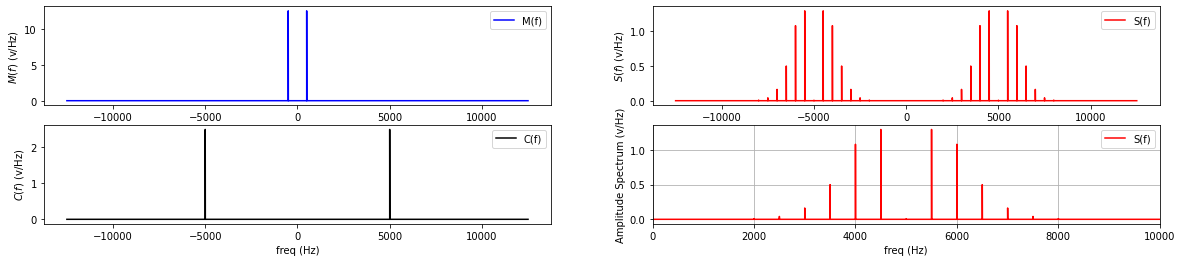

In [ ]:
Am=25     # amplitude of the message signal 
fm=500     # frequency of the message signal 
Ac=5       # amplitude of the carrier signal 
fc=5000    # frequency of the carrier signal
B=2.41      # FM modulaton Index 

Tstart=0
Tstop=100000/fc
Tstep=0.2/fc
t=np.arange(Tstart,Tstop,Tstep)   # time
N=len(t)

## -- no need to change code after this line
mt=Am*np.cos(2*math.pi*fm*t)      # message signal 
ct=Ac*np.cos(2*math.pi*fc*t)      # carrier signal
Kf=B*fm/Am    # frequency-sensitivity factor
print('The frequency modulation index \u03B2=',B)
print('FM frequency-sensitivity = {} Hz/Volt'.format(Kf))
st=Ac*np.cos(2*math.pi*fc*t + B*np.sin(2*math.pi*fm*t)) # modulated signal (FM signal)

f = plt.figure(figsize=(20,4))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

## ---- frequency-domain
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
B= Kf*Am/fm     # FM modulation index
st=Ac*np.cos(2*math.pi*fc*t + B*np.sin(2*math.pi*fm*t)) # modulated signal (FM signal)

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax1.plot(freqs, Mf,'b',label='M(f)')
ax1.set_xlabel('freq (Hz)')
ax1.set_ylabel('$M(f)$ (v/Hz)')
ax1.legend()

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax3.plot(freqs, Cf,'k',label='C(f)')
ax3.set_xlabel('freq (Hz)')
ax3.set_ylabel('$C(f)$ (v/Hz)')
ax3.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax2.plot(freqs, Sf,'r',label='S(f)')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

ax4.plot(freqs, Sf,'r',label='S(f)')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('Amplitude Spectrum (v/Hz)')
xmin, xmax = ax4.get_xlim()
df=xmax-fc;
if (fc+10*fm < xmax) and (fc-10*fm > 0):
   ax4.set_xlim([fc-10*fm, fc+10*fm])
elif (fc-10*fm > 0):
   ax4.set_xlim([fc-10*fm, xmax])
elif (fc+10*fm < xmax):
   ax4.set_xlim([0, fc+10*fm])
else:
  ax4.set_xlim([0, xmax]) 
ax4.grid()
ax4.legend()

As observed from the $s(f)$ plot, we obtained a zero at $f_c=5KHz$. The frequency-sensitivity in this case is 48.2 Hz/Volt 

**Exercise 1:** Determine another two values of $\beta$ at which the impulse at $f_c$ is zero. Plot the curves in each case and determine the frequency sesitivity. 

**Exercise 2:** Plot the curves and determine the frequency sesitivity at which the impulse at $f_c$ is zero (first zero-crossing at $\beta=2.41$) for each of the following cases:
1. $A_m=15 , f_m=250 Hz$
1. $A_m=15 , f_m=500 Hz$
1. $A_m=15 , f_m=750 Hz$
1. $A_m=10 , f_m=500 Hz$
1. $A_m=20 , f_m=500 Hz$
1. $A_m=30 , f_m=500 Hz$



# FM Demodulation

Let us use the discriminator to demodulate the FM signal. The discriminator used here is a differentator followed by an envelope detector.

The output of the differentiator is $\frac{ds}{dt}=-2 \pi A_c \left[  f_c +k_f  m(t) \right] \sin \left( 2\pi f_c t +k_f \int_0^t m(\tau)d\tau \right)$

$\frac{ds}{dt}=-2 \pi A_c \left[  f_c +k_f  Am \cos(2\pi f_m t) \right] \sin \left( 2\pi f_c t +\beta \sin(2 \pi f_m t   )\right)$



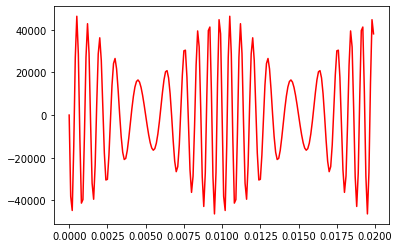

In [ ]:
# generate the FM signal
Am=5    # amplitude of the message signal 
fm=100     # frequency of the message signal 
Ac=5       # amplitude of the carrier signal 
fc=1000    # frequency of the carrier signal 
Kf=100    # frequency-snsitivity factor

Tstart=0   # setting the run-time (t-axis)
Tstop=2e-2
Tstep=1e-4
t=np.arange(Tstart,Tstop,Tstep)

mt=Am*np.cos(2*math.pi*fm*t)    # message signal 
ct=Ac*np.cos(2*math.pi*fc*t)    # carrier signal
B= Kf*Am/fm                       # FM modulation index
st=Ac*np.cos(2*math.pi*fc*t + B*np.sin(2*math.pi*fm*t)) # modulated signal (FM signal)
ds= -2*math.pi*Ac*(fc + Kf* mt)*np.sin(2*math.pi*fc*t +B*np.sin(2*math.pi*fm*t))
plt.plot(t,ds,'r')

The signal at the output of the discriminator is an amplitude modulated (AM) signal. Consequently, if $f_c$ is large enough such that the carrier is not overmodulated, then we can recover the message signal with an envelope detector in a manner similar to that in AM signals. 

Let us now restore the message signal by removing the DC component of the signal at the output of the discriminator

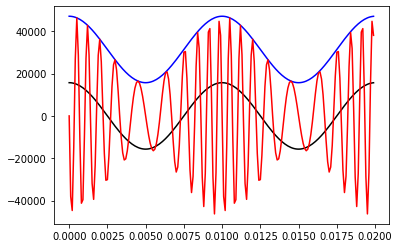

In [ ]:
At= np.abs(-2*math.pi*Ac*(fc + Kf* mt) )    # signal after envelope detector (before removing DE component)
dc= At - np.mean(At)                # the DC component
plt.plot(t,At,'b')
plt.plot(t,dc,'k')
plt.plot(t,ds,'r')

# FM of Square Wave

Let us now plot the FM signal when the modulating signal $m(t)$ is a square wave.

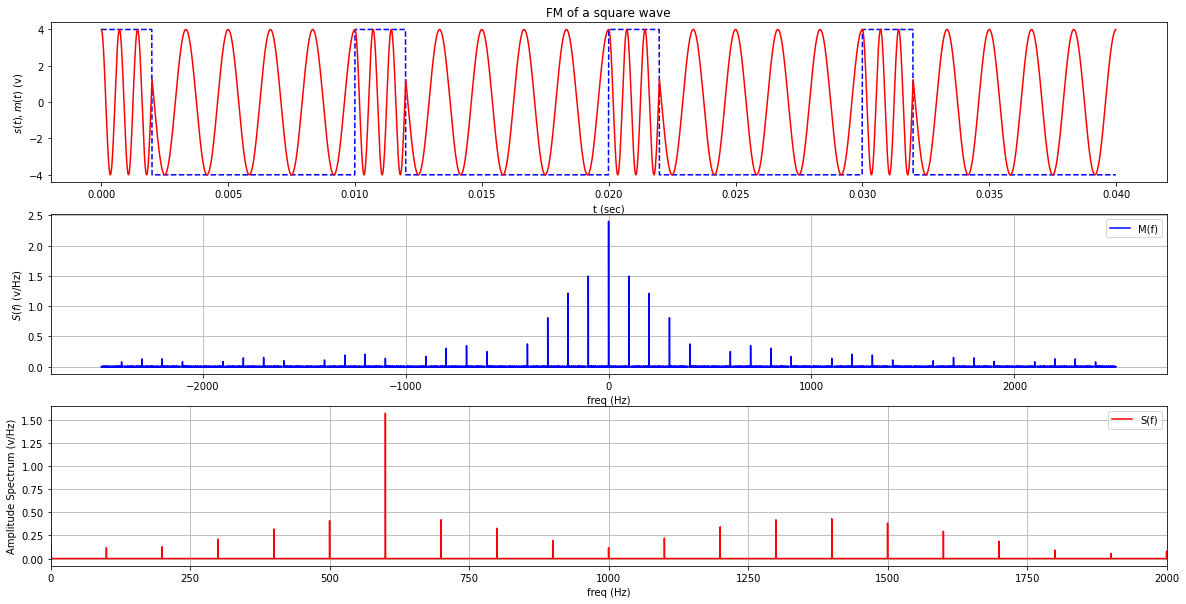

In [ ]:
# generate the FM signal
Am=4       # aplitude of the message signal 
fm=100     # frequency of the message signal 
Ac=4       # amplitude of the carrier signal 
fc=1000    # frequency of the carrier signal 
Kf=100     # frequency-snsitivity factor
du=0.2     # duty cycle (Ton/(Ton+Tof))


T=1/(2*np.pi*fm)
Tstart=0   # setting the run-time (t-axis)
Tstop=4*T*2*np.pi
Tstep=1e-5
t=np.arange(Tstart,Tstop,Tstep)
#mt= Am* (signal.square(2 * np.pi * fm * t))
mt = Am * signal.square(t/T, duty=du)
ct=Ac*np.cos(2*math.pi*fc*t)
st=Ac*np.cos(2*math.pi*fc*t + 2*Kf*math.pi*(mt)*t)


f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(311)
ax2 = f.add_subplot(312)
ax3 = f.add_subplot(313)


ax1.plot(t,mt,'b--' )
ax1.plot(t,st,'r')
ax1.set_xlabel('t (sec)')
ax1.set_ylabel('$s(t), m(t)$ (v)')
ax1.set_title('FM of a square wave')


Tstart=0
#Tstop=100000/fc
Tstop=4000*T*2*np.pi
Tstep=0.2/fc
t=np.arange(Tstart,Tstop,Tstep)   # time
N=len(t)
mt = Am * signal.square(t/T, duty=du)
ct=Ac*np.cos(2*math.pi*fc*t)
st=Ac*np.cos(2*math.pi*fc*t + 2*Kf*math.pi*(mt)*t)

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='M(f)')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()
ax2.grid()


Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax3.plot(freqs, Sf,'r',label='S(f)')
ax3.set_xlabel('freq (Hz)')
ax3.set_ylabel('Amplitude Spectrum (v/Hz)')
xmin, xmax = ax3.get_xlim()
df=xmax-fc;
if (fc+10*fm < xmax) and (fc-10*fm > 0):
   ax3.set_xlim([fc-10*fm, fc+10*fm])
elif (fc-10*fm > 0):
   ax3.set_xlim([fc-10*fm, xmax])
elif (fc+10*fm < xmax):
   ax3.set_xlim([0, fc+10*fm])
else:
  ax3.set_xlim([0, xmax]) 
ax3.grid()
ax3.legend()

**Exercise:** Vary the amplitude and duty cyle of the square message signal and observe the FM modulated signal in the time and frequency domain.


# Phase Modulation

The phase modulated signal is given by: $s_{PM}(t)=A_c \cos\left( 2 \pi f_c t+k_p m(t) \right)$. 

Let us now look at the PM signal for the case when the message signal is $m(t)=A_m cos(2 \pi f_m t)$. The PM modulated signal is $s(t)=A_c \cos\left( 2 \pi f_c t+k_p A_m \cos(2\pi f_m t) \right)$.

Let us compute and plot the PM and FM modulation of $m(t)$.

Text(0.5, 1.0, 'FM signal')

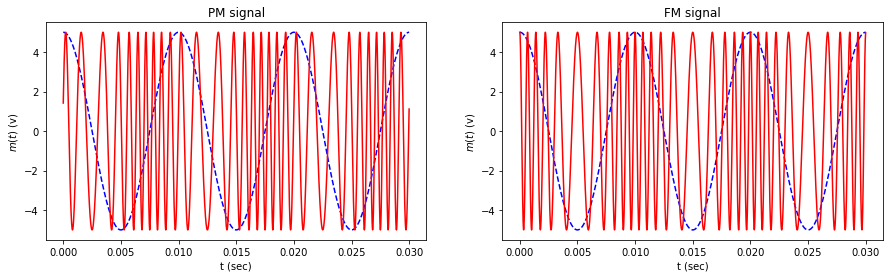

In [ ]:
Am=5     # amplitude of the message signal 
fm=100     # frequency of the message signal 
Ac=5       # amplitude of the carrier signal 
fc=1000    # frequency of the carrier signal 
Kp=1    # frequency-snsitivity factor

Tstart=0   # setting the run-time (t-axis)
Tstop=3e-2
Tstep=1e-5
t=np.arange(Tstart,Tstop,Tstep)

mt=Am*np.cos(2*math.pi*fm*t)    # message signal
ct=Ac*np.cos(2*math.pi*fc*t)    # carrier signal


f = plt.figure(figsize=(15,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

B= Kf*Am/fm     # FM modulation index
FM_st= Ac*np.cos(2*math.pi*fc*t + B*np.sin(2*math.pi*fm*t)) # modulated signal (FM signal)
PM_st= Ac*np.cos(2*math.pi*fc*t + Kp*mt) # modulated signal (PM signal)

ax1.plot(t,mt,'b--')  # plot the message signal (modulating signal)
ax1.plot(t,PM_st,'r') # plot the FM signal (modulated signal)
ax1.set_xlabel('t (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.set_title('PM signal')

ax2.plot(t,mt,'b--')  # plot the message signal (modulating signal)
ax2.plot(t,FM_st,'r') # plot the FM signal (modulated signal)
ax2.set_xlabel('t (sec)')
ax2.set_ylabel('$m(t)$ (v)')
ax2.set_title('FM signal')

**Exercise :** Vary $A_m$ and $f_m$ of the message signal and observe the PM and FM modulated signals.

The FM modulated signal of a message $m_{1}(t)$ can be expressed as $s_{FM}(t)=A_c \cos\left( 2 \pi f_c t+ k_f \int_0^t m_{1}(\tau) d\tau \right)$. And thus if $m_{1}(t)=\frac{dm(t)}{dt}$, then $s_{PM}(t)= s_{FM}(t)$. In other words, to computer the Phase modulation of $m(t)$, we can compute $m_{1}(t)=\frac{dm(t)}{dt}$ and then apply $m_1(t)$ to the FM modulator.

Next, we will compute and plot the PM modulation of $m_t()$. We will also compute and plot the FM modulation of $m_{1}(t)=\frac{dm(t)}{dt}$.

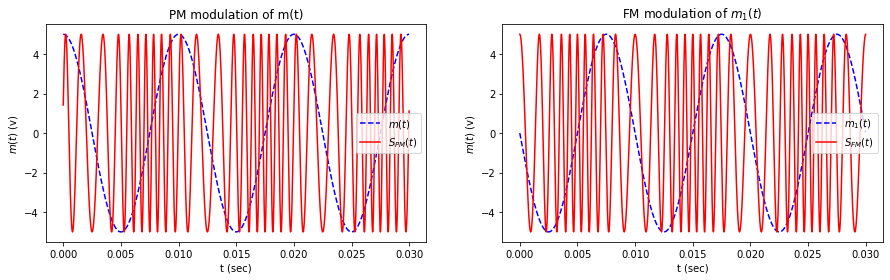

In [ ]:
Am=5     # amplitude of the message signal 
fm=100     # frequency of the message signal 
Ac=5       # amplitude of the carrier signal 
fc=1000    # frequency of the carrier signal 
Kp=1    # frequency-snsitivity factor

Tstart=0   # setting the run-time (t-axis)
Tstop=3e-2
Tstep=1e-5
t=np.arange(Tstart,Tstop,Tstep)

mt=Am*np.cos(2*math.pi*fm*t)    # message signal
dmt=-1*Am*2*math.pi*np.sin(2*math.pi*fm*t)    # message signal
ct=Ac*np.cos(2*math.pi*fc*t)    # carrier signal
Kf=Kp/(2*math.pi)

f = plt.figure(figsize=(15,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

B= Kf*Am/fm     # FM modulation index
FM_st= Ac*np.cos(2*math.pi*fc*t + Kf*dmt) # modulated signal (FM signal)
PM_st= Ac*np.cos(2*math.pi*fc*t + Kp*mt) # modulated signal (PM signal)

ax1.plot(t,mt,'b--',label='$m(t)$')  # plot the message signal (modulating signal)
ax1.plot(t,PM_st,'r',label='$S_{PM}(t)$') # plot the FM signal (modulated signal)
ax1.set_xlabel('t (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.set_title('PM modulation of m(t)')
ax1.legend()

ax2.plot(t,Kf*dmt,'b--',label='$m_1(t)$')  # plot the message signal (modulating signal)
ax2.plot(t,FM_st,'r',label='$S_{FM}(t)$') # plot the FM signal (modulated signal)
ax2.set_xlabel('t (sec)')
ax2.set_ylabel('$m(t)$ (v)')
ax2.set_title('FM modulation of $m_{1}(t)$')
ax2.legend()

**Exercise 1:** Observe the curves in the above figures and compare the PM and FM modulated signals.

**Exercise 2:** Vary $A_m$ and $f_m$ and confirm the relation between the PM and FM modulated signals.